In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rc('font', size = 16)                 # Use big fonts...
plt.rcParams['figure.figsize'] = (8,8) 
from matplotlib.pyplot import cm
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import norm
import matplotlib.mlab as mlab
from scipy.integrate import quad
%config InlineBackend.figure_format = 'retina'
from tqdm.notebook import tqdm

Liquid Xenon diffusion properties:

In [22]:
numerical_aperture = 0.22
distance = 2 # mm
length_xy = numerical_aperture*distance
print(length_xy)
Dt = 6e-3 # mm2/us
Dl = 7.5e-3 # mm2/us
time = np.linspace(1,5200,100)
time_lamp = np.linspace(1e-6,6,25)

delta_t = time[1] - time[0] 
vd = 0.5

0.44


In [23]:
time_lamp

array([1.00000000e-06, 2.50000958e-01, 5.00000917e-01, 7.50000875e-01,
       1.00000083e+00, 1.25000079e+00, 1.50000075e+00, 1.75000071e+00,
       2.00000067e+00, 2.25000063e+00, 2.50000058e+00, 2.75000054e+00,
       3.00000050e+00, 3.25000046e+00, 3.50000042e+00, 3.75000037e+00,
       4.00000033e+00, 4.25000029e+00, 4.50000025e+00, 4.75000021e+00,
       5.00000017e+00, 5.25000012e+00, 5.50000008e+00, 5.75000004e+00,
       6.00000000e+00])

In [24]:
time_lamp[1]-time_lamp[0]

0.2499999583333333

182208.52740102218


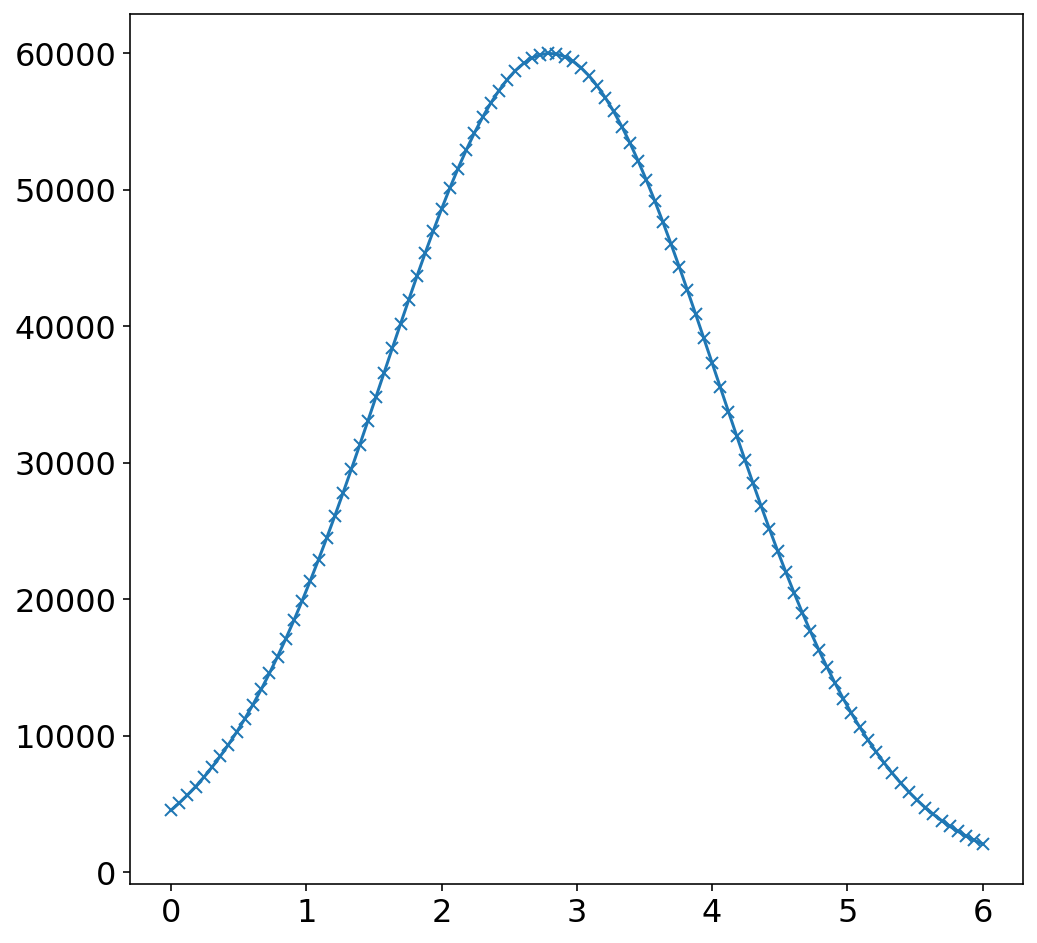

In [20]:
def Pulse_lamp(t):
    calc = 6e4*np.exp(-(t-2.8)**2/2/(2.90/2.355)**2 )
    return calc

population, error = quad(Pulse_lamp, 0,6,epsrel = 1e-6)

print(population)

plt.plot(time_lamp, Pulse_lamp(time_lamp), ls = '-', marker = 'x')

In [11]:
def init_positions(sigma_xy, electrons):
    mu, sigma = 0, np.sqrt(sigma_xy) # mean and standard deviation
    X0 = np.random.normal(mu, sigma, electrons)
    Y0 = np.random.normal(mu,sigma, electrons)
    Z0 = np.random.normal(mu,1e-3, electrons)
    return X0,Y0,Z0

(array([5.000e+00, 9.000e+00, 2.500e+01, 4.300e+01, 9.700e+01, 2.540e+02,
        4.440e+02, 8.970e+02, 1.434e+03, 2.332e+03, 3.335e+03, 4.445e+03,
        5.407e+03, 6.187e+03, 6.708e+03, 6.658e+03, 5.895e+03, 4.973e+03,
        3.874e+03, 2.751e+03, 1.826e+03, 1.146e+03, 6.490e+02, 3.330e+02,
        1.610e+02, 6.900e+01, 3.100e+01, 8.000e+00, 2.000e+00, 2.000e+00]),
 array([-2.73658818, -2.55073852, -2.36488885, -2.17903918, -1.99318952,
        -1.80733985, -1.62149018, -1.43564052, -1.24979085, -1.06394118,
        -0.87809152, -0.69224185, -0.50639218, -0.32054252, -0.13469285,
         0.05115682,  0.23700648,  0.42285615,  0.60870582,  0.79455548,
         0.98040515,  1.16625482,  1.35210448,  1.53795415,  1.72380382,
         1.90965348,  2.09550315,  2.28135282,  2.46720248,  2.65305215,
         2.83890181]),
 <BarContainer object of 30 artists>)

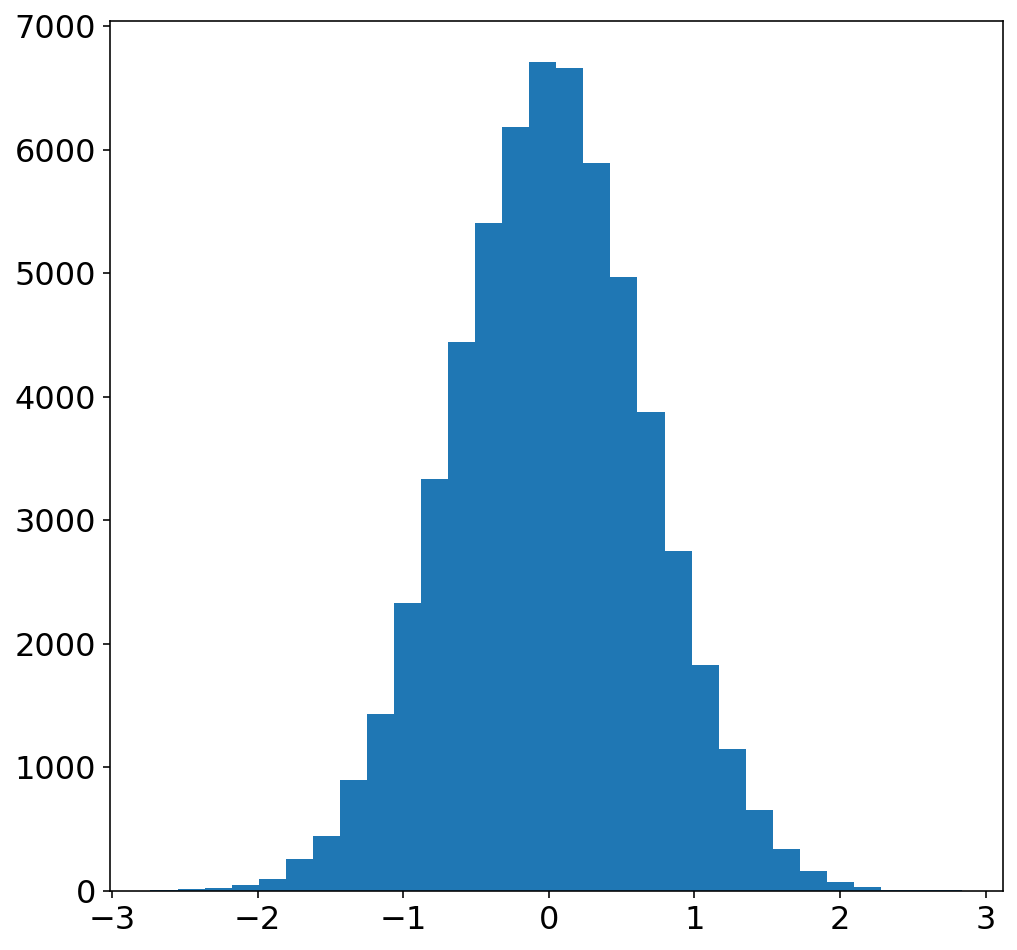

In [8]:
X0,Y0,Z0 = init_positions(length_xy,int(6e4))
plt.hist(X0, 30)

In [9]:
X0_results =[]
Y0_results =[]
Z0_results =[]

for t in tqdm(range(len(time_lamp))):
    if(t == 0):
        population = int(quad(Pulse_lamp, 0, time_lamp[t])[0])
    else:
        population = int(quad(Pulse_lamp, time_lamp[t-1], time_lamp[t])[0])
    X0,Y0,Z0 = init_positions(length_xy,population)
    for j in tqdm(range(len(X0))):
        for i in time:
            X0[j] += np.sqrt(Dt*delta_t)*float(np.random.normal(0, 1, 1))
            Y0[j] += np.sqrt(Dt*delta_t)*float(np.random.normal(0, 1, 1))
            Z0[j] += np.sqrt(Dl*delta_t)*float(np.random.normal(0, 1, 1))    
    X0_results.extend(X0)
    Y0_results.extend(Y0)
    Z0_results.extend(Z0 + np.ones(len(Z0))*vd*(time[-1]-time_lamp[t]))



  0%|          | 0/25 [00:00<?, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/1426 [00:00<?, ?it/s]

  0%|          | 0/2168 [00:00<?, ?it/s]

  0%|          | 0/3164 [00:00<?, ?it/s]

  0%|          | 0/4431 [00:00<?, ?it/s]

  0%|          | 0/5956 [00:00<?, ?it/s]

  0%|          | 0/7683 [00:00<?, ?it/s]

  0%|          | 0/9513 [00:00<?, ?it/s]

  0%|          | 0/11304 [00:00<?, ?it/s]

  0%|          | 0/12892 [00:00<?, ?it/s]

  0%|          | 0/14111 [00:00<?, ?it/s]

  0%|          | 0/14824 [00:00<?, ?it/s]

  0%|          | 0/14946 [00:00<?, ?it/s]

  0%|          | 0/14463 [00:00<?, ?it/s]

  0%|          | 0/13432 [00:00<?, ?it/s]

  0%|          | 0/11973 [00:00<?, ?it/s]

  0%|          | 0/10243 [00:00<?, ?it/s]

  0%|          | 0/8410 [00:00<?, ?it/s]

  0%|          | 0/6627 [00:00<?, ?it/s]

  0%|          | 0/5012 [00:00<?, ?it/s]

  0%|          | 0/3638 [00:00<?, ?it/s]

  0%|          | 0/2534 [00:00<?, ?it/s]

  0%|          | 0/1694 [00:00<?, ?it/s]

  0%|          | 0/1087 [00:00<?, ?it/s]

  0%|          | 0/669 [00:00<?, ?it/s]

In [ ]:
# X0_results =[]
# Y0_results =[]
# Z0_results =[]
# f = open("diffusion_results_2.6",'r')
# lines = f.readlines()
# for line in lines[1:]:
#     x0_results = float(line.split(',')[0])
#     y0_results = float(line.split(',')[1])
#     z0_results = float(line.split(',')[2])
#     X0_results.append(x0_results), Y0_results.append(y0_results), Z0_results.append(z0_results)
# f.close()


(0.0, 0.08)

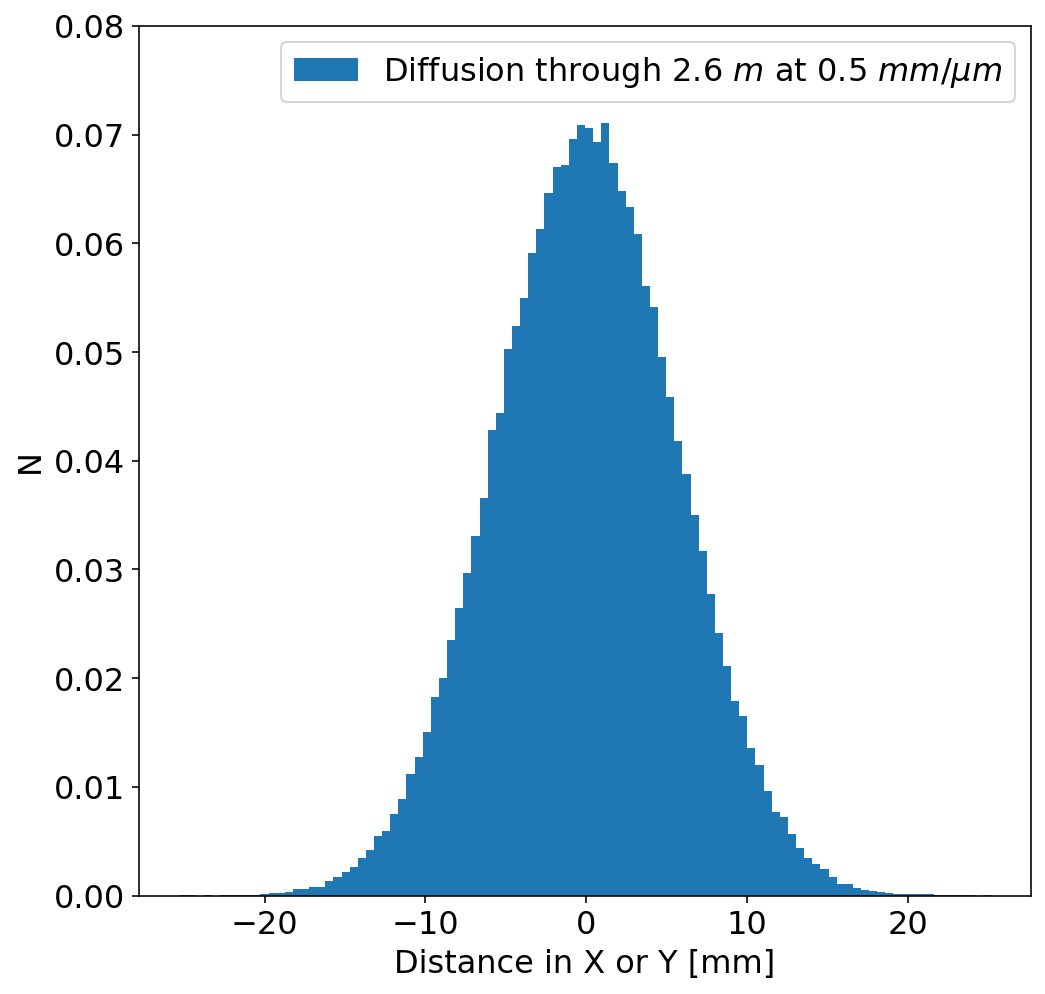

In [10]:
n, bins, patches = plt.hist(np.asarray(X0_results) , bins=100, density=True, label = r'Diffusion through $2.6~m$ at $0.5~mm/\mu m$')
plt.legend()
plt.xlabel('Distance in X or Y [mm]')
plt.ylabel('N')
plt.ylim(0, 0.08)


#- 2499*np.ones(len(Z0_results))

(0.0, 0.07)

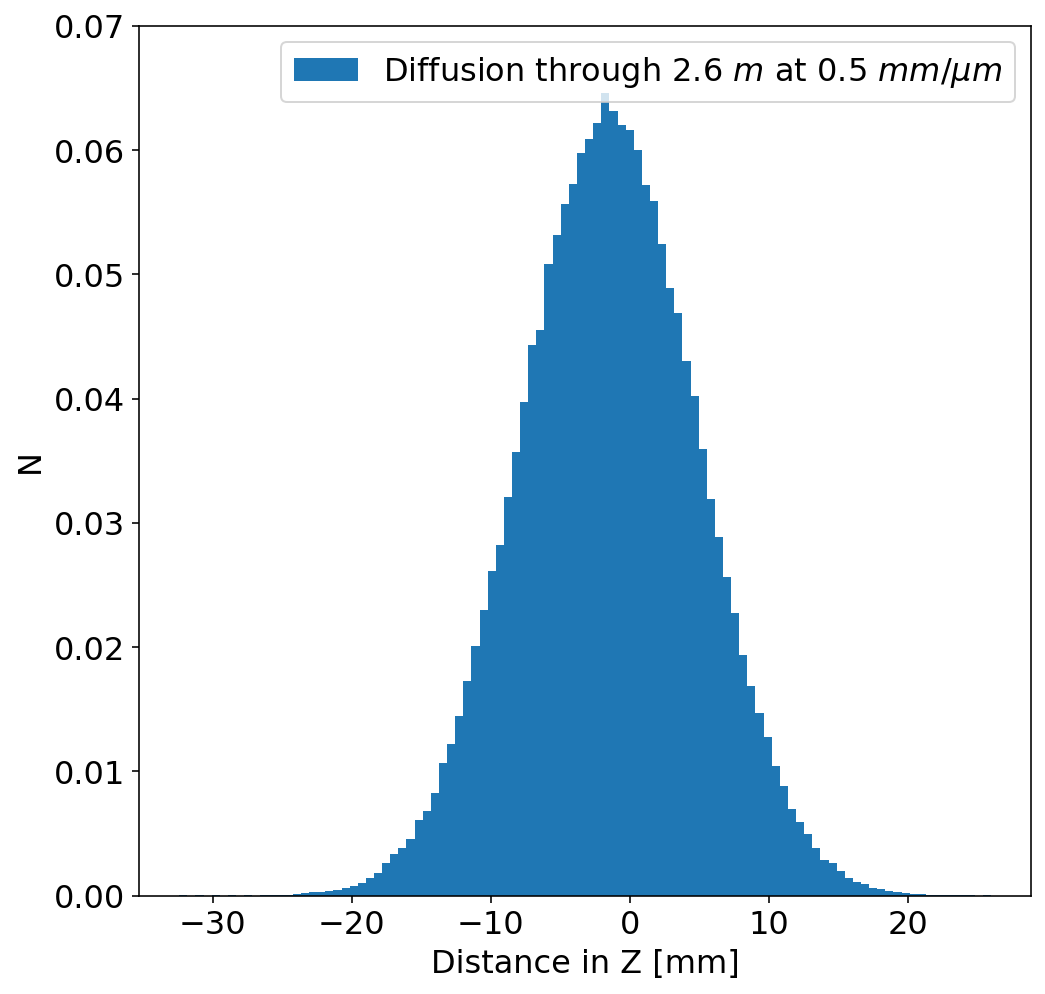

In [11]:
n, bins, patches = plt.hist(np.asarray(Z0_results) - np.ones(len(Z0_results))*2600 , bins=100, density=True, label = r'Diffusion through $2.6~m$ at $0.5~mm/\mu m$')
plt.legend()
plt.xlabel('Distance in Z [mm]')
plt.ylabel('N')
plt.ylim(0, 0.07)


#- 2499*np.ones(len(Z0_results))

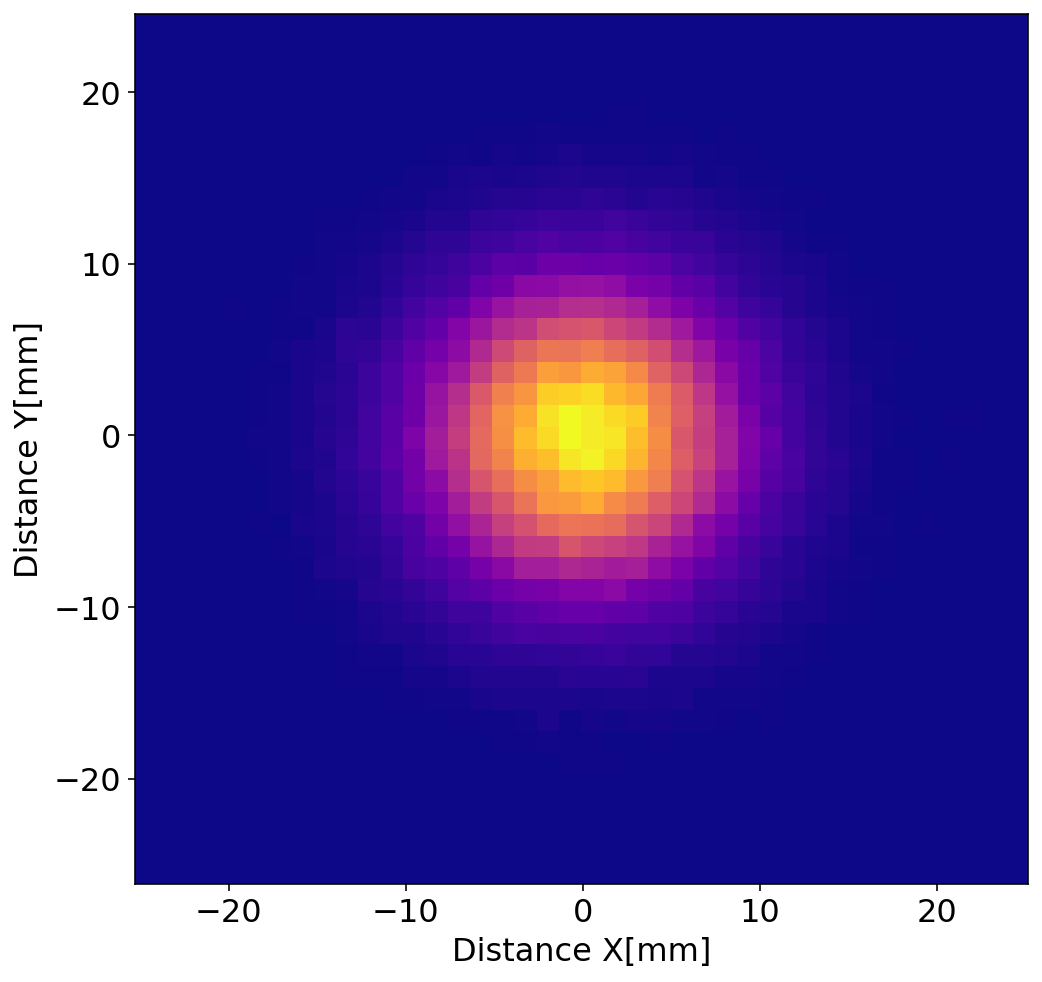

In [12]:
fig, ax = plt.subplots()
im = plt.hist2d( X0_results,Y0_results, bins=40, cmap='plasma')
plt.xlabel('Distance X[mm]')
plt.ylabel('Distance Y[mm]')
plt.savefig('xy_diffusion.png', format='png',bbox_inches="tight")


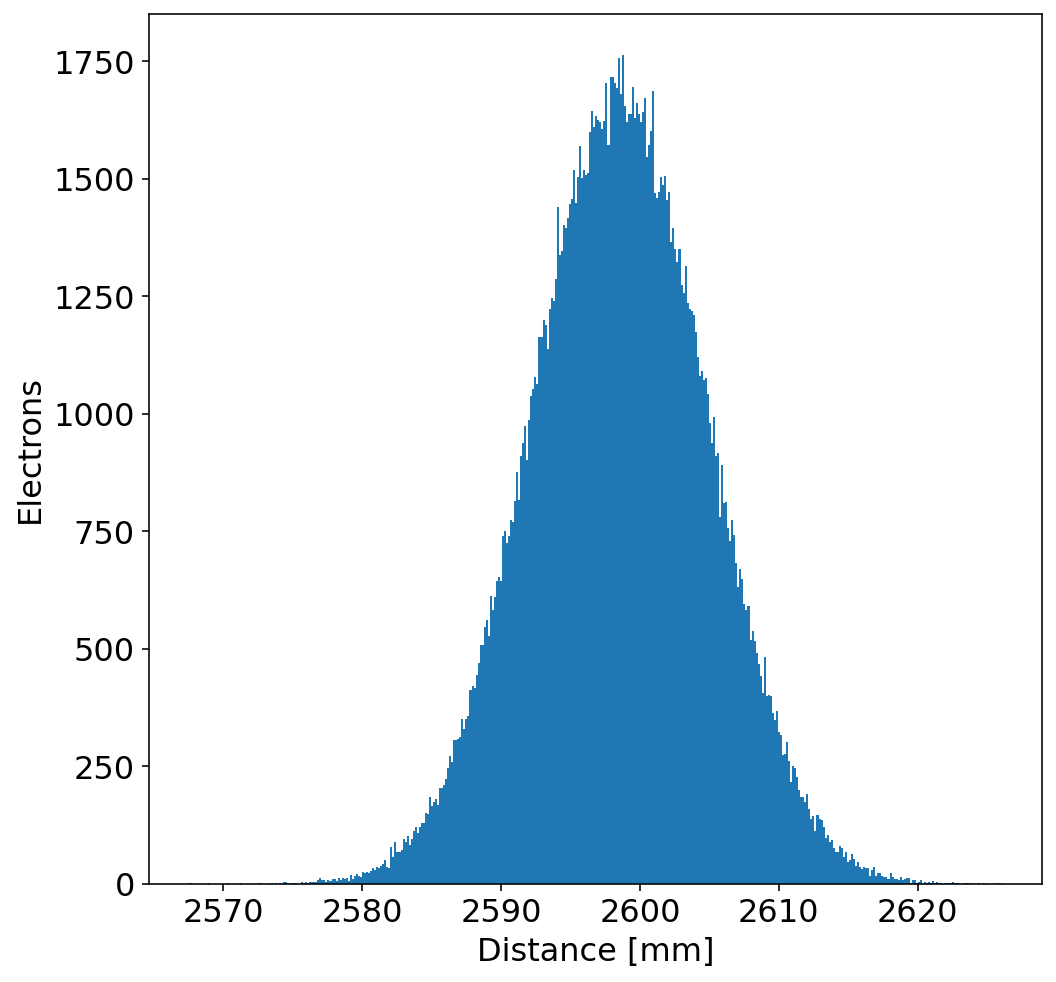

In [13]:
(mus, sigmas) = norm.fit(X0_results)
# y = mlab.normpdf( bins, mus, sigmas)
# l = plt.plot(bins, y, 'r--', linewidth=2)
n, bins, patches = plt.hist(Z0_results, bins= 400)
plt.ylabel('Electrons')
plt.xlabel('Distance [mm]')
plt.savefig('x_diffusion.png', format='png',bbox_inches="tight")


In [1]:
import pandas as pd

X = np.array(X0_results)
Y = np.array(Y0_results)
Z = np.array(Z0_results)

df = pd.DataFrame({"X":X,"Y":Y, "Z":Z})
df.to_csv("diffusion_results_2.6", index=False)

NameError: name 'np' is not defined